In [1]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

Here is a second example of a statistical hypothesis test, in a completely different context.

A Berkeley Statistics class of about 350 students was divided into 12 discussion sections led by Graduate Student Instructors (GSIs). After the midterm, students in Section 3 noticed that their scores were on average lower than the rest of the class. 

In such situations, students tend to grumble about the section's GSI. Surely, they feel, there must have been something wrong with the GSI's teaching. Or else why would their section have done worse than others?

The GSI, typically more experienced about statistical variation, often has a different perspective: if you simply draw a section of students at random from the whole class, their average score could resemble the score that the students are unhappy about, just by chance.

The GSI's position is a clearly stated chance model. Let's test it out.

**Null Hypothesis.** The average score of Section 3 is like the average score of the same number of students picked at random from the class. 

**Alternative Hypothesis.** No, it's too low.

The table `scores` contains the section number and midterm score for each student in a large class. The midterm scores were integers in the range 0 through 25; 0 means that the student didn't take the test.

In [2]:
scores = Table.read_table('scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


Here are the average scores in the 12 sections. 

In [3]:
scores.group('Section', np.mean).show()

Section,Midterm mean
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


Section 3 did score a bit lower, on average, than the other sections. Does this look like chance variation?

We know how to find out. Let's start by picking a "Section 3" at random from the whole class and see what its average score is; and then do that again and again. 

First, we need the number of students in Section 3:

In [4]:
scores.group('Section')

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


Now our plan is to pick 27 students at random from the class and find their average score. 

The scores of all the students are in a table with one row per student. So we will use `sample` to randomly select rows, again using the option `with_replacement=False` so that we sample without replacement.

In [5]:
def average_score(section):
    return np.mean(section.column("Midterm"))

In [6]:
average_score(scores.sample(27, with_replacement=False))

14.62962962962963

We are ready to repeatedly simulate the average exam grade of section 3, under our null hypothesis.

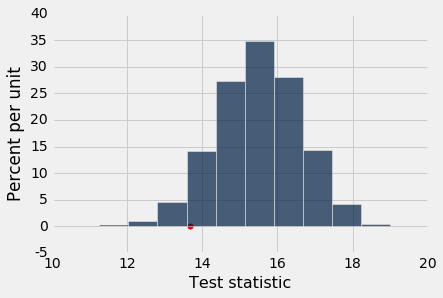

In [8]:
def simulate_scores_under_null(section_size):
    random_section = scores.sample(section_size, with_replacement=False)
    return average_score(random_section)

section_3_mean = 13.6667
repetitions = 10000

simulations = Table().with_columns(
    "Section size", np.repeat(27, repetitions))
test_statistics_under_null = simulations.apply(simulate_scores_under_null, "Section size")
results = simulations.with_column("Test statistic", test_statistics_under_null)
results.hist("Test statistic")  

# Plot the observed statistic as a large red point on the horizontal axis
plots.scatter(section_3_mean, 0, color='red', s=30);

From the histogram, the low mean in section 3 looks somewhat unusual, but it certainly could have happened if section 3's grades were just random samples from all the grades.  A substantial fraction of the average section grades would be even lower than 13.6667 if the null hypothesis were true.